Simpl Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#Importing the stuff
#downloding the data
!curl -o FuleConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

# make it data in python 
DF = pd.read_csv("FuleConsumption.csv")
DF.head


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72629  100 72629    0     0   208k      0 --:--:-- --:--:-- --:--:--  209k


<bound method NDFrame.head of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_C

In [2]:
DF.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTI

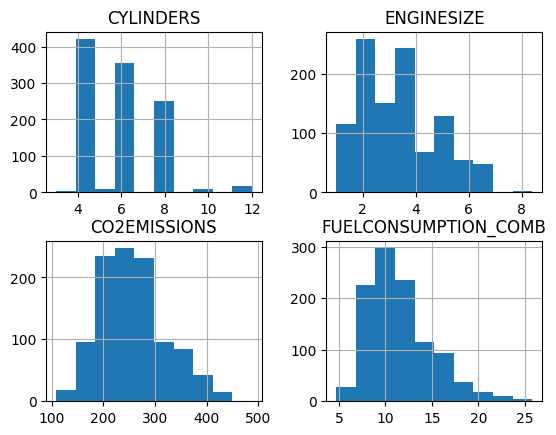

In [3]:
cdf = DF[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)
#Seting to histogram 
tohist= cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
#ploting it (in fromat hist)
tohist.hist()

#Showing it 
plt.show()

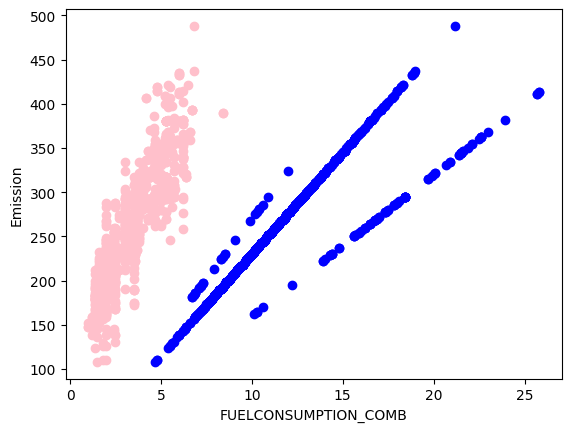

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "pink")
#this is a great pink
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

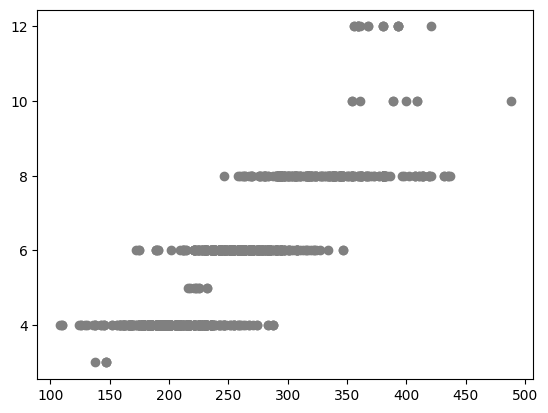

In [5]:
#pLOT CO2 VS cylenders 
plt.scatter(cdf.CO2EMISSIONS , cdf.CYLINDERS, color = "grey" )


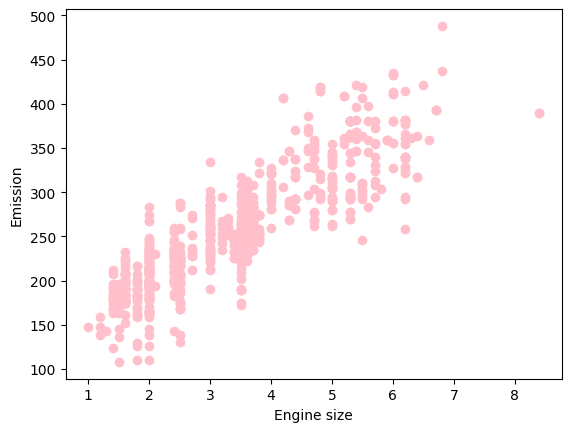

In [6]:
mask = np.random.rand(len(cdf)) < 0.8
train = cdf[mask]
test = cdf[~mask]
#~ does leftover appparently
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='pink')

plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [7]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
xTrained = np.asanyarray(train[["ENGINESIZE"]])
yTrained =  np.asanyarray(train[["CO2EMISSIONS"]])
regress.fit(xTrained,yTrained)

print(regress.coef_)
print(regress.intercept_)

[[39.62910297]]
[123.37494119]


Text(0, 0.5, 'Emission')

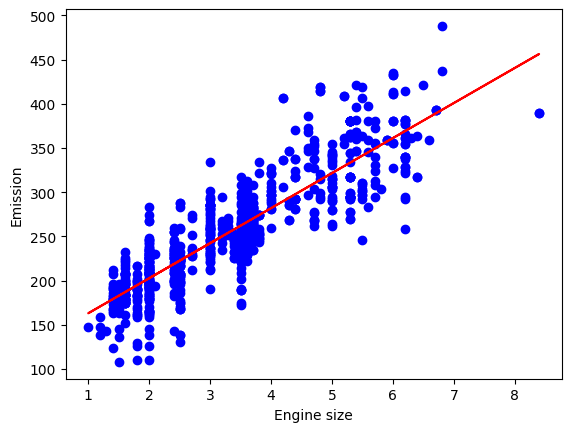

In [8]:
#Ploting the out put 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(xTrained, regress.coef_[0][0]*xTrained + regress.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [9]:
#Time 2 Test 
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regress.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 21.91
Residual sum of squares (MSE): 779.03
R2-score: 0.78


Exersize

[[16.46995585]]
[65.61344378]


Text(0, 0.5, 'Emission')

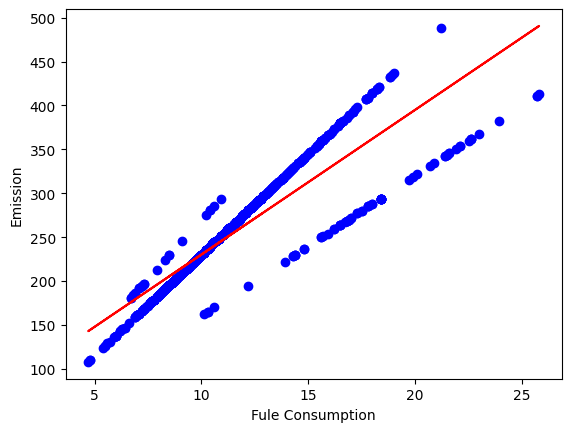

In [10]:
# so the same thing but using fule consumption as the x axis 
xTrained = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
regress.fit(xTrained,yTrained)

print(regress.coef_)
print(regress.intercept_)

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(xTrained, regress.coef_[0][0]*xTrained + regress.intercept_[0], '-r')
plt.xlabel("Fule Consumption")
plt.ylabel("Emission")





In [11]:
#use predictions on it
predictions = regress.predict(test_x)
predictions

array([[123.25828926],
       [105.14133782],
       [123.25828926],
       [143.02223629],
       [ 98.55335548],
       [115.02331134],
       [115.02331134],
       [115.02331134],
       [151.25721421],
       [134.78725836],
       [ 98.55335548],
       [ 98.55335548],
       [ 98.55335548],
       [ 98.55335548],
       [ 98.55335548],
       [115.02331134],
       [138.08124953],
       [115.02331134],
       [138.08124953],
       [138.08124953],
       [138.08124953],
       [115.02331134],
       [138.08124953],
       [115.02331134],
       [124.90528485],
       [105.14133782],
       [105.14133782],
       [ 98.55335548],
       [105.14133782],
       [ 98.55335548],
       [115.02331134],
       [124.90528485],
       [167.72717007],
       [167.72717007],
       [167.72717007],
       [124.90528485],
       [167.72717007],
       [ 88.67138197],
       [ 95.25936431],
       [152.9042098 ],
       [152.9042098 ],
       [164.4331789 ],
       [ 98.55335548],
       [106

In [12]:
#Finally use the predictions and the test_y data and find the Mean Absolute Error value
# using the np.absolute and np.mean function like done previously
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 135.74
